<a href="https://colab.research.google.com/github/SergiCala/DataScience.io/blob/main/Bank_account_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import io
from google.colab import files
upload = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv(io.BytesIO(upload["Churn_Modelling.csv"]))

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Drop the columns we dont need

x = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# Separate the last column to be the target

y = df[df.columns[-1]]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Convert the data using OneHotEncoding to change values to numbers
x = pd.get_dummies(x)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
# Normalize the data with StandarScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.32622142  0.29351742 -1.04175968 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -0.57380915 -0.91241915
   0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ... -0.57380915  1.09598752
  -1.09598752]]


In [ ]:
x.shape

(10000, 13)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=2)
print("x train: {}, x test: {}, y train: {}, y test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

x train: (8000, 13), x test: (2000, 13), y train: (8000,), y test: (2000,)


In [ ]:
# Create the variable N 
n_entrance = x_train.shape[1]
print(n)

(8000, 13)


In [ ]:
# Create the tensor with pytorch to transform the data 
t_x_train = torch.from_numpy(x_train).float().to("cpu")
t_x_test = torch.from_numpy(x_test).float().to("cpu")
t_y_train = torch.from_numpy(y_train.values).float().to("cpu")
t_y_test = torch.from_numpy(y_test.values).float().to("cpu")
t_y_train = t_y_train[:,None]
t_y_test = t_y_test[:,None]

In [ ]:
test = TensorDataset(t_x_test, t_y_test)
print(test[0])

(tensor([ 0.8326, -0.0879,  1.7245,  0.7569,  0.8077,  0.6461, -1.0307,  1.2390,
         0.9972, -0.5787, -0.5738,  1.0960, -1.0960]), tensor([1.]))


In [ ]:
t_y_train 

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In Pytorch to create the NN we need to create a class first

In [ ]:
# Neural Network Creation

class Red(nn.Module):

    def __init__(self, n_entrance):
      super(Red, self).__init__()
      self.Linear1 = nn.Linear(n_entrance, 15)
      self.Linear2 = nn.Linear(15, 8)
      self.Linear3 = nn.Linear(8, 1)
      

    def forward(self, inputs):
      pred_1 = torch.sigmoid(input=self.Linear1(inputs))
      pred_2 = torch.sigmoid(input=self.Linear2(pred_1))
      pred_f = torch.sigmoid(input=self.Linear3(pred_2))
      
      return pred_f


In [ ]:
t_y_test[0]

tensor([1.])

In [ ]:
%%time
lr = 0.001
epochs = 2000
estatus_print = 100

model = Red(n_entrance=n_entrance)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
print("Architecture : {}".format(model))
historic = pd.DataFrame()

print("Training the model")
for epoch in range(1, epochs+1):
    y_pred= model(t_x_train)
    loss = loss_fn(input=y_pred, target=t_y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % estatus_print == 0:
        print(f"\nEpoch {epoch} \t Loss: {round(loss.item(), 4)}")
    
    with torch.no_grad():
        y_pred = model(t_x_test)
        y_pred_class = y_pred.round()
        correct = (y_pred_class == t_y_test).sum()
        accuracy = 100 * correct / float(len(t_y_test))
        if epoch % estatus_print == 0:
            print("Accuracy: {}".format(accuracy.item()))
    
    df_tmp = pd.DataFrame(data={
        'Epoch': epoch,
        'Loss': round(loss.item(), 4),
        'Accuracy': round(accuracy.item(), 4)
    }, index=[0])
    historic = pd.concat(objs=[historico, df_tmp], ignore_index=True, sort=False)

print("Accuracy final: {}".format(round(accuracy.item(), 4)))

Architecture : Red(
  (Linear1): Linear(in_features=13, out_features=15, bias=True)
  (Linear2): Linear(in_features=15, out_features=8, bias=True)
  (Linear3): Linear(in_features=8, out_features=1, bias=True)
)
Entranando el modelo

Epoch 100 	 Loss: 0.6662
Accuracy: 80.69999694824219

Epoch 200 	 Loss: 0.5503
Accuracy: 80.8499984741211

Epoch 300 	 Loss: 0.5041
Accuracy: 80.8499984741211

Epoch 400 	 Loss: 0.4867
Accuracy: 80.8499984741211

Epoch 500 	 Loss: 0.4782
Accuracy: 80.8499984741211

Epoch 600 	 Loss: 0.472
Accuracy: 80.8499984741211

Epoch 700 	 Loss: 0.4665
Accuracy: 80.8499984741211

Epoch 800 	 Loss: 0.4613
Accuracy: 80.8499984741211

Epoch 900 	 Loss: 0.4564
Accuracy: 80.8499984741211

Epoch 1000 	 Loss: 0.4519
Accuracy: 80.8499984741211

Epoch 1100 	 Loss: 0.4476
Accuracy: 80.8499984741211

Epoch 1200 	 Loss: 0.4433
Accuracy: 80.8499984741211

Epoch 1300 	 Loss: 0.4389
Accuracy: 80.8499984741211

Epoch 1400 	 Loss: 0.4343
Accuracy: 80.8499984741211

Epoch 1500 	 Loss: 0

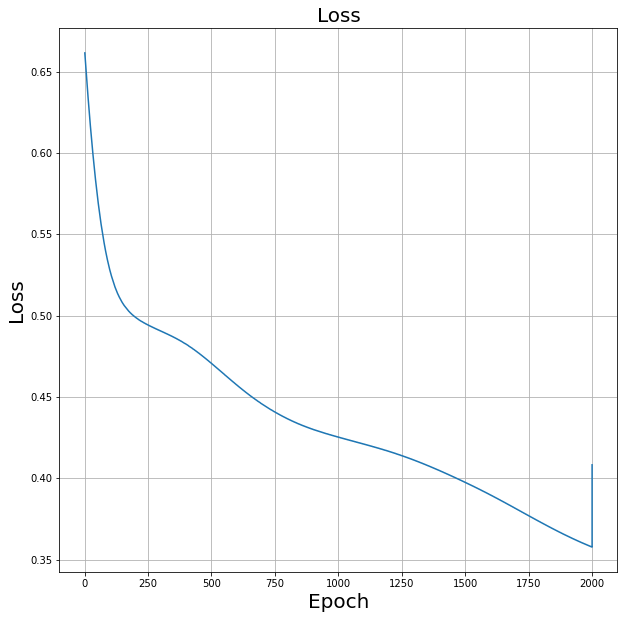

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.plot(historic['Epoch'], historic["Loss"], label="Loss")
plt.title("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.grid()
plt.show()

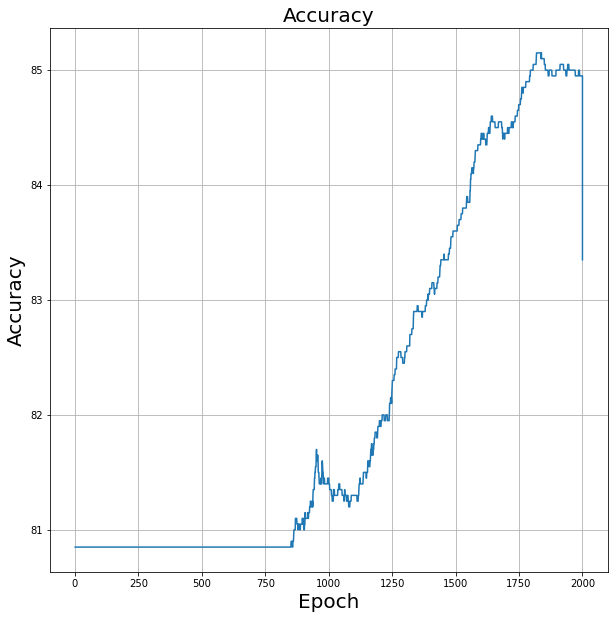

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(historic['Epoch'], historic["Accuracy"], label="Accuracy")
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid()
plt.show()

In [ ]:
t_x_test[04]

tensor([ 0.8326, -0.0879,  1.7245,  0.7569,  0.8077,  0.6461, -1.0307,  1.2390,
         0.9972, -0.5787, -0.5738,  1.0960, -1.0960])

In [ ]:
prediction = model(t_x_test[4])
print(prediction)

tensor([0.0771], grad_fn=<SigmoidBackward0>)


In [ ]:
t_y_test[4]

tensor([0.])